In [1]:
import pandas as pd
import numpy as np 

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.1f}'.format)

df = pd.read_excel('HIST_PAINEL_COVIDBR.xlsx')
# df = df.drop(df[df.municipio.isnull()].index)
# df_base = pd.read_excel('HIST_PAINEL_COVIDBR BASE.xlsx')
# df = pd.concat([df_base, df], axis=0)

In [28]:
# df[df.municipio == 'São Paulo']
# df[df.data == '2020-05-30']
df = df.drop(df[df.data == '2020-05-30'].index)

In [3]:
# df_novo[df_novo.municipio == 'São Paulo']
# df_novo[75600:75650]

In [29]:
a = df[['estado', 'municipio', 'data']].groupby(['estado', 'municipio']).agg(np.count_nonzero)

In [30]:
b = df[df.municipio.notna()][['municipio', 'data']].groupby(['data']).agg(np.count_nonzero)

In [31]:
df2 = pd.DataFrame(columns=b.index, index = a.index)

In [32]:
for uf_mun in df2.index:
    c = df[(df.estado == uf_mun[0]) & (df.municipio == uf_mun[1])][['data', 'obitosAcumulado']].set_index('data')
    for data in c.index:
        df2.at[(uf_mun[0], uf_mun[1]), data] = c.loc[data].obitosAcumulado

In [33]:
tam = len(df2.columns)
df3 = df2.iloc[:,1:tam]
df3.columns = list(range(0,tam-1))
df4 = df2.iloc[:,0:tam-1]
df4.columns = list(range(0,tam-1))
df5 = df3 - df4
df5.columns = df2.columns[1:]

In [34]:
df2.loc['SP', 'São Paulo']

data
2020-03-28      76
2020-03-29      89
2020-03-30     103
2020-03-31     121
2020-04-01     144
              ... 
2020-05-24    3534
2020-05-25    3555
2020-05-26    3691
2020-05-27    3826
2020-05-28    3958
Name: (SP, São Paulo), Length: 62, dtype: object

In [35]:
df5 = df5.fillna(0)
df6 = pd.DataFrame(columns=df5.columns, index=df5.index)
for x in df5.index:
    for c in range(0,tam):
        if c >= 7:
            df6.at[x, df2.columns[c]] = df5.loc[x][c-7:c].mean()
df6 = df6.fillna(0)

In [36]:
q_pico = []
d_pico = []
for x in df6.index:
    # print(df6.loc[x])
    q_pico.append(df6.loc[x].max())
    d_pico.append(df6.columns[df6.loc[x].argmax()])

In [37]:
# df6.loc[('AC', 'Acrelândia')]
# df6 = df6.fillna(0)

In [38]:
df7 = pd.DataFrame(df6.iloc[:,-1], index=df6.index)
df7['Q_Pico'] = pd.Series(q_pico, index=df6.index)
df7['D_Pico'] = pd.Series(d_pico, index=df6.index)
df7.columns = ['Ult_7_Dias', 'Pico', 'Dia_do_Pico']
df7['Delta %'] = df7['Ult_7_Dias'] / df7['Pico'] - 1
df7 = df7.sort_values('Ult_7_Dias', ascending=False)
df7.head(10)

,,Ult_7_Dias,Pico,Dia_do_Pico,Delta %
estado,municipio,,,,
RJ,Rio de Janeiro,131.0,135.9,2020-05-23,-0.0
SP,São Paulo,102.9,102.9,2020-05-28,0.0
CE,Fortaleza,43.0,66.3,2020-05-21,-0.4
PA,Belém,41.7,65.3,2020-05-25,-0.4
PE,Recife,36.7,37.9,2020-05-22,-0.0
AM,Manaus,31.4,42.9,2020-05-20,-0.3
BA,Salvador,20.3,20.3,2020-05-28,0.0
PE,Jaboatão dos Guararapes,10.4,11.0,2020-05-24,-0.1
MA,São Luís,9.9,15.9,2020-05-12,-0.4


### Número de óbtidos por COVID-19
    Ranking 10 maiores cidades brasileiras - considerando últ 7 dias
    Valores apresentam média diária de óbitos em 7 dias
    Atualizado com dados até 23/05/2020
    Data no formato aaaa-mm-dd
    Fonte: Secretarias Estaduais de Saúde. Brasil.
    https://covid.saude.gov.br/

In [52]:
df7.head(30)

,,Ult_7_Dias,Pico,Dia_do_Pico,Delta %
estado,municipio,,,,
RJ,Rio de Janeiro,131.0,135.9,2020-05-23,-0.0
SP,São Paulo,102.9,102.9,2020-05-28,0.0
CE,Fortaleza,43.0,66.3,2020-05-21,-0.4
PA,Belém,41.7,65.3,2020-05-25,-0.4
PE,Recife,36.7,37.9,2020-05-22,-0.0
AM,Manaus,31.4,42.9,2020-05-20,-0.3
BA,Salvador,20.3,20.3,2020-05-28,0.0
PE,Jaboatão dos Guararapes,10.4,11.0,2020-05-24,-0.1
MA,São Luís,9.9,15.9,2020-05-12,-0.4


In [39]:
lista_interesse = [('MG', 'Uberlândia'), ('SP', 'Americana'), ('MG', 'Patos de Minas'), ('DF', 'Brasília'), ('MG', 'Patrocínio'), ('MG', 'Araguari')]
df7.loc[lista_interesse].sort_values('Ult_7_Dias', ascending=False)

Ult_7_Dias  Pico Dia_do_Pico  Delta %
estado municipio                                            
DF     Brasília               8.3   8.3  2020-05-28      0.0
MG     Uberlândia             0.4   0.4  2020-04-26      0.0
SP     Americana              0.3   0.3  2020-04-05      0.0
MG     Patos de Minas         0.0   0.1  2020-04-10     -1.0
       Patrocínio             0.0   0.1  2020-04-14     -1.0
       Araguari               0.0   0.1  2020-04-27     -1.0

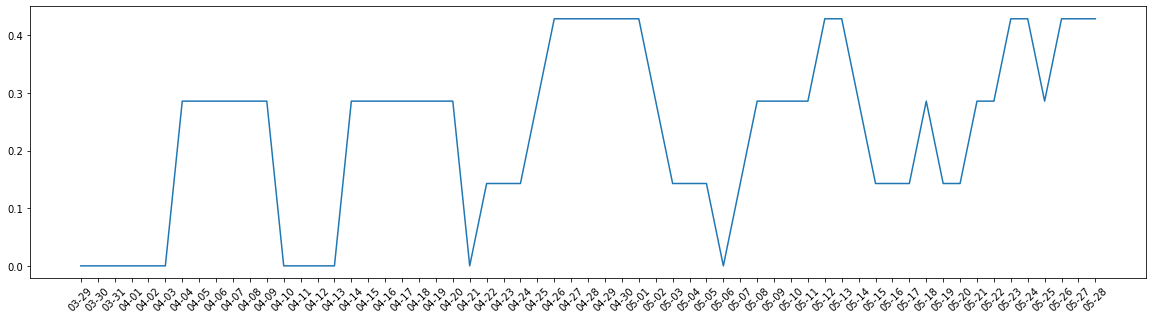

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df6.loc['MG', 'Uberlândia']
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    if type(x) == str:
        dates.append(x[5:])
    else:
        dates.append(str(x.month) + '-' + str(x.day))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [41]:
# str(df6.loc['RJ', 'Rio de Janeiro'].index[0].day) + '-' + str(df6.loc['RJ', 'Rio de Janeiro'].index[0].month)
# x[5:]

In [42]:
# df[df.municipio == 'Rio de Janeiro'].tail(20)